In [1]:
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm
from metpy.calc import dewpoint_from_relative_humidity
from metpy.calc import specific_humidity_from_dewpoint
from metpy.units import units
import numpy as np

import matplotlib.pyplot as plt


/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
ifs_hres = xr.open_zarr('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data_ai-models/ifs_fc/ec_det_fc_2021-06_NA.zarr')

In [3]:
ifs_hres 

<xarray.Dataset> Size: 7GB
Dimensions:                  (time: 22, prediction_timedelta: 11,
                              latitude: 221, longitude: 481, level: 13)
Coordinates:
  * latitude                 (latitude) float32 884B 25.0 25.25 ... 79.75 80.0
  * level                    (level) int32 52B 50 100 150 200 ... 850 925 1000
  * longitude                (longitude) float32 2kB -180.0 -179.8 ... -60.0
  * prediction_timedelta     (prediction_timedelta) timedelta64[ns] 88B 0 day...
  * time                     (time) datetime64[ns] 176B 2021-06-14 ... 2021-0...
Data variables:
    10m_u_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 103MB dask.array<chunksize=(1, 1, 221, 481), meta=np.ndarray>
    10m_v_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 103MB dask.array<chunksize=(1, 1, 221, 481), meta=np.ndarray>
    2m_temperature           (time, prediction_timedelta, latitude, longitude) float32 103MB dask.array<chunksize=(1, 1, 221, 481), meta=np.ndarray>
    geopotential             (time, prediction_timedelta, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 221, 481), meta=np.ndarray>
    mean_sea_level_pressure  (time, prediction_timedelta, latitude, longitude) float32 103MB dask.array<chunksize=(1, 1, 221, 481), meta=np.ndarray>
    specific_humidity        (time, prediction_timedelta, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 221, 481), meta=np.ndarray>
    temperature              (time, prediction_timedelta, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 221, 481), meta=np.ndarray>
    u_component_of_wind      (time, prediction_timedelta, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 221, 481), meta=np.ndarray>
    v_component_of_wind      (time, prediction_timedelta, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 221, 481), meta=np.ndarray>

In [4]:
ifs_hres_t2m_0629 = {}

# Loop through the specified range
for i, day in enumerate(range(19, 30)):
    ifs_hres_t2m_0629[f'06{day}'] = ifs_hres['2m_temperature'][5+i, 10-i, :, :]

In [5]:
ifs_hres_z500_0629 = {}

# Loop through the specified range
for i, day in enumerate(range(19, 30)):
    ifs_hres_z500_0629[f'06{day}'] = ifs_hres['geopotential'][5+i, 10-i, 7,:, :]

In [6]:
pangu = xr.open_zarr('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data_ai-models/pangu_wb2/pangu_fc_JJ_2021_ifs_det_wb2.zarr')

In [7]:
pangu

<xarray.Dataset> Size: 634GB
Dimensions:                  (time: 46, prediction_timedelta: 40,
                              latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                 (latitude) float32 3kB 90.0 89.75 ... -89.75 -90.0
  * level                    (level) int64 104B 1000 925 850 700 ... 150 100 50
  * longitude                (longitude) float32 6kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta     (prediction_timedelta) timedelta64[ns] 320B 06:0...
  * time                     (time) datetime64[ns] 368B 2021-06-14 ... 2021-0...
Data variables:
    10m_u_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 8GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind  (time, prediction_timedelta, latitude, longitude) float32 8GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_wind_speed           (time, prediction_timedelta, latitude, longitude) float32 8GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature           (time, prediction_timedelta, latitude, longitude) float32 8GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential             (time, prediction_timedelta, level, latitude, longitude) float32 99GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure  (time, prediction_timedelta, latitude, longitude) float32 8GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    specific_humidity        (time, prediction_timedelta, level, latitude, longitude) float32 99GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    temperature              (time, prediction_timedelta, level, latitude, longitude) float32 99GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    u_component_of_wind      (time, prediction_timedelta, level, latitude, longitude) float32 99GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind      (time, prediction_timedelta, level, latitude, longitude) float32 99GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    wind_speed               (time, prediction_timedelta, level, latitude, longitude) float32 99GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [8]:
base_path = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data_ai-models/pangu_wb2/pangu_fc_JJ_2021_ifs_det_wb2.zarr'
new_dimension = 'time'
var_pangu_expanded = []

for i in range(0, 10):
    ds_pangu = xr.open_zarr(base_path)
    var_pangu = ds_pangu['2m_temperature'].isel(time=10+2*i, prediction_timedelta=39 - i * 4, latitude=slice(260, 40, -1), longitude=slice(720, 1200))
    var_pangu_expanded.append(var_pangu.expand_dims({new_dimension: [i]}))

ds_pangu_t2m_na_0629 = xr.concat(var_pangu_expanded, dim=new_dimension)

In [9]:
base_path = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data_ai-models/pangu_wb2/pangu_fc_JJ_2021_ifs_det_wb2.zarr'
new_dimension = 'time'
var_pangu_expanded = []

for i in range(0, 10):
    ds_pangu = xr.open_zarr(base_path)
    var_pangu = ds_pangu['geopotential'].isel(time=10+2*i, prediction_timedelta=39 - i * 4, latitude=slice(260, 40, -1), longitude=slice(720, 1200),level =5)
    var_pangu_expanded.append(var_pangu.expand_dims({new_dimension: [i]}))

ds_pangu_z500_na_0629 = xr.concat(var_pangu_expanded, dim=new_dimension)

In [10]:
import xarray as xr
import os
from datetime import datetime, timedelta
def generate_date_range(start_date, end_date):
    """
    Generate a list of dates between start_date and end_date.

    Parameters:
    start_date (str): The start date in the format 'YYYY-MM-DD'.
    end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
    list: A list of date strings in the format 'YYYY-MM-DD'.
    """
    start = datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.strptime(end_date, '%Y-%m-%d')
    delta = timedelta(days=1)
    dates = []
    while start <= end:
        dates.append(start.strftime('%Y-%m-%d'))
        start += delta
    return dates
    
def read_grib_files_na(data_path, start_date, end_date, file_template,var_name):
    """
    Reads GRIB files within a specified date range and concatenates them along the time dimension.

    Parameters:
    data_path (str): The directory path containing the GRIB files.
    start_date (str): The start date in the format 'YYYY-MM-DD'.
    end_date (str): The end date in the format 'YYYY-MM-DD'.
    file_template (str): The template for the filenames, e.g., 'fcnv2_fc_ifs_{date}_0000_m51.grib'.
                         Use '{date}' as a placeholder for the date.

    Returns:
    xarray.Dataset: The concatenated dataset containing data from all the specified GRIB files.
    """
   
    date_range = generate_date_range(start_date, end_date)

   
    datasets = []

    print(datasets)
    for date_str in date_range:
        file_path = os.path.join(data_path.format(date=date_str), file_template.format(date=date_str))
        if os.path.exists(file_path):
            ds = xr.open_dataset(file_path, engine='cfgrib',filter_by_keys={'paramId': 167, 'typeOfLevel': 'heightAboveGround', 'level': 2})
            datasets.append(ds[var_name][:,260:39:-1,720:1201])

    #combined_ds = xr.concat(datasets, dim='time')

    return datasets

In [11]:
data_path = '/pfs/work7/workspace/scratch/gj5173-ws_ai_models/ifs/{date}/forecasts'
start_date = '2021-06-15'
end_date = '2021-06-28'
file_template = 'fcnv2_fc_ifs_{date}_0000_m51.grib'
var_name = 't2m'
ds_fcnv2_ec_df_0615_0628_t2m = read_grib_files_na(data_path, start_date, end_date, file_template,var_name)

[]


In [12]:
ds_fcnv2_ec_df_0619_0629_t2m = ds_fcnv2_ec_df_0615_0628_t2m[4].sel(step = '10days 00:00:00')
ds_fcnv2_ec_df_0622_0629_t2m = ds_fcnv2_ec_df_0615_0628_t2m[7].sel(step = '7days 00:00:00')
ds_fcnv2_ec_df_0624_0629_t2m = ds_fcnv2_ec_df_0615_0628_t2m[9].sel(step = '5days 00:00:00')

In [13]:
fcnv2_hres_df_0619 =xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/ifs/2021-06-19/forecasts/fcnv2_fc_ifs_2021-06-19_0000_m51.grib', engine='cfgrib')
fcnv2_hres_df_0622 =xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/ifs/2021-06-22/forecasts/fcnv2_fc_ifs_2021-06-22_0000_m51.grib', engine='cfgrib')
fcnv2_hres_df_0624 =xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/ifs/2021-06-24/forecasts/fcnv2_fc_ifs_2021-06-24_0000_m51.grib', engine='cfgrib')



skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/cfgrib/dataset.py", line 701, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/cfgrib/dataset.py", line 629, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/cfgrib/dataset.py", line 701, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/cfgrib/dataset.py", line 629, in dict_me

In [15]:
fcnv2_hres_df_0624_z500_0629 =fcnv2_hres_df_0624['z'][:,5,:,:].sel(step = '5days 00:00:00')
fcnv2_hres_df_0622_z500_0629 =fcnv2_hres_df_0622['z'][:,5,:,:].sel(step = '7days 00:00:00')
fcnv2_hres_df_0619_z500_0629 = fcnv2_hres_df_0619['z'][:,5,:,:].sel(step = '10days 00:00:00')

In [16]:
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')
ds_era
ds_era5_t2m_0629 = ds_era.fields[716,2,260:40:-1,720:1200]

In [17]:
ds_era5_t2m_0629

<xarray.DataArray 'fields' (phony_dim_2: 220, phony_dim_3: 480)> Size: 422kB
[105600 values with dtype=float32]
Dimensions without coordinates: phony_dim_2, phony_dim_3

In [18]:
############################# z500 ###########################################
########################################################### load climatology dataset ############################################################
clim_z500 = xr.open_dataset('/home/kit/imktro/gj5173/tmp/clim_Z50000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point',engine = 'netcdf4')


In [19]:
clim_z500

<xarray.Dataset> Size: 107kB
Dimensions:  (lon: 240, lat: 110)
Coordinates:
  * lon      (lon) float32 960B -180.0 -179.5 -179.0 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 440B 25.0 25.5 26.0 26.5 27.0 ... 78.0 78.5 79.0 79.5
    plev     float64 8B ...
Data variables:
    Z        (lat, lon) float32 106kB ...

In [20]:
new_latitude = np.linspace(25.0, 80.0, 110)  # New latitude points (for example)
new_longitude = np.linspace(-180.0, -60.0, 240)  # New longitude points (for example)

In [21]:
ifs_hres_z500_0629_0619_interpolated = ifs_hres_z500_0629['0619'].interp(latitude=new_latitude, longitude=new_longitude)
ifs_hres_z500_0629_0622_interpolated = ifs_hres_z500_0629['0622'].interp(latitude=new_latitude, longitude=new_longitude)
ifs_hres_z500_0629_0624_interpolated = ifs_hres_z500_0629['0624'].interp(latitude=new_latitude, longitude=new_longitude)

In [27]:
anao_ds_ifs_z500_na_0629_0619 = ifs_hres_z500_0629_0619_interpolated -clim_z500.Z.values
anao_ds_ifs_z500_na_0629_0622 = ifs_hres_z500_0629_0622_interpolated -clim_z500.Z.values
anao_ds_ifs_z500_na_0629_0624 = ifs_hres_z500_0629_0624_interpolated -clim_z500.Z.values

In [32]:
new_latitude_fcnv2 = np.linspace(25.0, 80.0, 110)  # New latitude points (for example)
new_longitude_fcnv2 = np.linspace(180.0, 300, 240)  # New longitude points (for example)


In [33]:
fcnv2_hres_df_0624_z500_0629_inter =fcnv2_hres_df_0624_z500_0629[260:39:-1,720:1201].interp(latitude=new_latitude_fcnv2, longitude=new_longitude_fcnv2)
fcnv2_hres_df_0622_z500_0629_inter =fcnv2_hres_df_0622_z500_0629[260:39:-1,720:1201].interp(latitude=new_latitude_fcnv2, longitude=new_longitude_fcnv2)
fcnv2_hres_df_0619_z500_0629_inter  =fcnv2_hres_df_0619_z500_0629[260:39:-1,720:1201].interp(latitude=new_latitude_fcnv2, longitude=new_longitude_fcnv2)

In [34]:
def calculate_batch_difference(v1, v2, batch_size):
    """
    Calculate the point-wise difference between two arrays (v2 - v1) in batches.

    Parameters:
    - v1: The first input array.
    - v2: The second input array.
    - batch_size: The desired batch size for processing.

    Returns:
    - An array containing the point-wise differences between v2 and v1.
    """
    # Get the shape of the input arrays
    rows, cols = v1.shape
    
    # Initialize the difference array
    difference = np.empty((rows, cols))

    for i in range(0, rows, batch_size):
        for j in range(0, cols, batch_size):
            batch_variable1 = v1[i:i + batch_size, j:j + batch_size]
            batch_variable2 = v2[i:i + batch_size, j:j + batch_size]
            
            # Calculate the difference point by point for the current batch
            batch_difference = batch_variable2 - batch_variable1

            # Update the difference array with the current batch_difference
            difference[i:i + batch_size, j:j + batch_size] = batch_difference

    return difference

In [37]:
anao_ds_fcnv2_z500_na_0629_0619 = calculate_batch_difference(clim_z500.Z.values,fcnv2_hres_df_0619_z500_0629_inter, 50)
anao_ds_fcnv2_z500_na_0629_0622 = calculate_batch_difference(clim_z500.Z.values,fcnv2_hres_df_0622_z500_0629_inter, 50)
anao_ds_fcnv2_z500_na_0629_0624 = calculate_batch_difference(clim_z500.Z.values,fcnv2_hres_df_0624_z500_0629_inter, 50)

In [45]:
ds_pangu_z500_na_0629_0619 = ds_pangu_z500_na_0629[0]
ds_pangu_z500_na_0629_0622 = ds_pangu_z500_na_0629[3]
ds_pangu_z500_na_0629_0624 = ds_pangu_z500_na_0629[5]

In [46]:
ds_pangu_z500_na_0629_0624

<xarray.DataArray 'geopotential' (latitude: 220, longitude: 480)> Size: 422kB
dask.array<getitem, shape=(220, 480), dtype=float32, chunksize=(220, 480), chunktype=numpy.ndarray>
Coordinates:
    time                  int64 8B 5
  * latitude              (latitude) float32 880B 25.0 25.25 25.5 ... 79.5 79.75
    level                 int64 8B 500
  * longitude             (longitude) float32 2kB 180.0 180.2 ... 299.5 299.8
    prediction_timedelta  timedelta64[ns] 8B 5 days

In [47]:
new_latitude_pangu = np.linspace(25.0, 79.75, 110)  # New latitude points (for example)
new_longitude_pangu = np.linspace(180.0, 299.75, 240)  # New longitude points (for example)

In [48]:
ds_pangu_z500_na_0629_0619_inter =ds_pangu_z500_na_0629_0619.interp(latitude=new_latitude_pangu, longitude=new_longitude_pangu).values
ds_pangu_z500_na_0629_0622_inter =ds_pangu_z500_na_0629_0622.interp(latitude=new_latitude_pangu, longitude=new_longitude_pangu).values
ds_pangu_z500_na_0629_0624_inter =ds_pangu_z500_na_0629_0624.interp(latitude=new_latitude_pangu, longitude=new_longitude_pangu).values

In [49]:
anao_ds_pangu_z500_na_0629_0619 = ds_pangu_z500_na_0629_0619_inter -clim_z500
anao_ds_pangu_z500_na_0629_0622 = ds_pangu_z500_na_0629_0622_inter -clim_z500
anao_ds_pangu_z500_na_0629_0624 = ds_pangu_z500_na_0629_0624_inter -clim_z500

In [50]:
anao_ds_pangu_z500_na_0629_0624

<xarray.Dataset> Size: 213kB
Dimensions:  (lat: 110, lon: 240)
Coordinates:
  * lon      (lon) float32 960B -180.0 -179.5 -179.0 ... -61.5 -61.0 -60.5
  * lat      (lat) float32 440B 25.0 25.5 26.0 26.5 27.0 ... 78.0 78.5 79.0 79.5
    plev     float64 8B ...
Data variables:
    Z        (lat, lon) float64 211kB 387.2 388.2 ... -1.198e+03 -1.207e+03

In [52]:
def calculate_batch_difference(v1, v2, batch_size):
    """
    Calculate the point-wise difference between two arrays (v2 - v1) in batches.

    Parameters:
    - v1: The first input array.
    - v2: The second input array.
    - batch_size: The desired batch size for processing.

    Returns:
    - An array containing the point-wise differences between v2 and v1.
    """
    # Get the shape of the input arrays
    rows, cols = v1.shape
    
    # Initialize the difference array
    difference = np.empty((rows, cols))

    for i in range(0, rows, batch_size):
        for j in range(0, cols, batch_size):
            batch_variable1 = v1[i:i + batch_size, j:j + batch_size]
            batch_variable2 = v2[i:i + batch_size, j:j + batch_size]
            
            # Calculate the difference point by point for the current batch
            batch_difference = batch_variable2 - batch_variable1

            # Update the difference array with the current batch_difference
            difference[i:i + batch_size, j:j + batch_size] = batch_difference

    return difference

In [53]:

difference_fcnv2_ec_era5_t2m_na_0619 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_fcnv2_ec_df_0619_0629_t2m[0:220,0:480],50)
difference_fcnv2_ec_era5_t2m_na_0622 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_fcnv2_ec_df_0622_0629_t2m[0:220,0:480], 50)
difference_fcnv2_ec_era5_t2m_na_0624 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_fcnv2_ec_df_0624_0629_t2m[0:220,0:480], 50)

difference_pangu_ec_era5_t2m_na_0619 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_pangu_t2m_na_0629[0,:,:], 50)
difference_pangu_ec_era5_t2m_na_0622 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_pangu_t2m_na_0629[3,:,:], 50)
difference_pangu_ec_era5_t2m_na_0624 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_pangu_t2m_na_0629[5,:,:], 50)

difference_ec_era5_t2m_na_0619 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ifs_hres_t2m_0629['0619'][0:220,0:480], 50)
difference_ec_era5_t2m_na_0622 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ifs_hres_t2m_0629['0622'][0:220,0:480], 50)
difference_ec_era5_t2m_na_0624 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ifs_hres_t2m_0629['0624'][0:220,0:480], 50)

In [54]:
#create 9 subplots with colorbar(0 in the middle)
def make_middle_9plots(v1,v2,v3,v4,v5,v6,v7,v8,v9,title1,title2,title3,title4,title5,title6,title7,title8,title9,pathdirect):
    
    fig, axs = plt.subplots(3, 3, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs
    lat = np.linspace(25, 80, 220)
    lon = np.linspace(-180, -60, 480)
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    x, y = lon_grid, lat_grid
    cmap = mcolors.LinearSegmentedColormap.from_list(name='red_white_blue', 
                                                     colors =[(0, 0, 1), 
                                                              (1, 1., 1), 
                                                              (1, 0, 0)],
                                                     N=22,
                                                     )
    
    vmax = max(v1.max(), v2.max(), v3.max(), v4.max(),v5.max(), v6.max(), v7.max(), v8.max(),v9.max())
    vmin = min(v1.min(), v2.min(), v3.min(), v4.min(),v5.min(), v6.min(), v7.min(), v8.min(),v9.min())
    
    
    norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    plot_kwargs = dict(cmap=cmap, norm = norm,levels = 20)
    
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #add star sign
    red_point_lon = -121.50
    red_point_lat = 50.25
    
    #add patch to show the box area 
    rect = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_1 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_2 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_3 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_4 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_5 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_6 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_7 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    rect_8 = patches.Rectangle((-131.5,40.25),20,20, linewidth=1, edgecolor='black', facecolor='none')
    
    
    
    
    
    ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.add_feature(cfeature.LAND, facecolor='lightgray')
    ax1.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #ax1.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    ax1.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    contour1 = ax1.contourf(x,y,v1,**plot_kwargs,extend = 'both')
    
    ax1.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax1.add_patch(rect)
    ax1.set_title(title1,loc='left')
    #ax1.set_ylabel(r1title)
    
    
    
    ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    ax2.add_feature(cfeature.LAND, facecolor='lightgray')
    ax2.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    #ax2.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)
    ax2.set_title(title2,loc='left')
    contour2 = ax2.contourf(x,y,v2,**plot_kwargs)
    ax2.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax2.add_patch(rect_1)
    
    
    
    ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax3.add_feature(cfeature.COASTLINE)
    ax3.add_feature(cfeature.BORDERS, linestyle=':')
    ax3.add_feature(cfeature.LAND, facecolor='lightgray')
    ax3.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    #ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax3.xaxis.set_major_formatter(lon_formatter)
    ax3.yaxis.set_major_formatter(lat_formatter)
    ax3.set_title(title3,loc='left')
    ax3.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    contour3 = ax3.contourf(x,y,v3,**plot_kwargs)
    ax3.add_patch(rect_2)
    
    
    
    
    ax4.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.COASTLINE)
    ax4.add_feature(cfeature.BORDERS, linestyle=':')
    ax4.add_feature(cfeature.LAND, facecolor='lightgray')
    ax4.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    ax4.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax4.xaxis.set_major_formatter(lon_formatter)
    ax4.yaxis.set_major_formatter(lat_formatter)
    contour4 = ax4.contourf(x,y,v4,**plot_kwargs)
    ax4.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax4.add_patch(rect_3)
   # ax4.set_ylabel(title4)
    ax4.set_title(title4,loc='left')
    
    
    
    
    
    ax5.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax5.add_feature(cfeature.COASTLINE)
    ax5.add_feature(cfeature.BORDERS, linestyle=':')
    ax5.add_feature(cfeature.LAND, facecolor='lightgray')
    ax5.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    #ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax5.xaxis.set_major_formatter(lon_formatter)
    ax5.yaxis.set_major_formatter(lat_formatter)
    contour4 = ax5.contourf(x,y,v5,**plot_kwargs)
    ax5.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax5.add_patch(rect_4)
    ax5.set_title(title5,loc='left')
    
    
    ax6.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax6.add_feature(cfeature.COASTLINE)
    ax6.add_feature(cfeature.BORDERS, linestyle=':')
    ax6.add_feature(cfeature.LAND, facecolor='lightgray')
    ax6.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    #ax4.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    #ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax6.xaxis.set_major_formatter(lon_formatter)
    ax6.yaxis.set_major_formatter(lat_formatter)
    contour4 = ax6.contourf(x,y,v6,**plot_kwargs)
    ax6.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax6.add_patch(rect_5)
    ax6.set_title(title6,loc='left')
    
    ax7.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax7.add_feature(cfeature.COASTLINE)
    ax7.add_feature(cfeature.BORDERS, linestyle=':')
    ax7.add_feature(cfeature.LAND, facecolor='lightgray')
    ax7.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    ax7.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    ax7.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax7.xaxis.set_major_formatter(lon_formatter)
    ax7.yaxis.set_major_formatter(lat_formatter)
    #ax7.set_ylabel(r3title)
    contour4 = ax7.contourf(x,y,v7,**plot_kwargs)
    ax7.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax7.add_patch(rect_6)
    ax7.set_title(title7,loc='left')
    
    ax8.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax8.add_feature(cfeature.COASTLINE)
    ax8.add_feature(cfeature.BORDERS, linestyle=':')
    ax8.add_feature(cfeature.LAND, facecolor='lightgray')
    ax8.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    ax8.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
    #ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax8.xaxis.set_major_formatter(lon_formatter)
    ax8.yaxis.set_major_formatter(lat_formatter)
    contour4 = ax8.contourf(x,y,v8,**plot_kwargs)
    ax8.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax8.add_patch(rect_7)
    ax8.set_title(title8,loc='left')
    
    
    ax9.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax9.add_feature(cfeature.COASTLINE)
    ax9.add_feature(cfeature.BORDERS, linestyle=':')
    ax9.add_feature(cfeature.LAND, facecolor='lightgray')
    ax9.add_feature(cfeature.OCEAN, facecolor='w')
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    ax9.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
    #ax5.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax9.xaxis.set_major_formatter(lon_formatter)
    ax9.yaxis.set_major_formatter(lat_formatter)
    contour4 = ax9.contourf(x,y,v9,**plot_kwargs)
    ax9.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
    ax9.add_patch(rect_8)
    ax9.set_title(title9,loc='left')
    
    #norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    #norm = mcolors.TwoSlopeNorm(vcenter=0)
    #pc = plt.pcolormesh(axs, norm=norm, cmap=cmap)
    #cb = plt.colorbar(pc,orientation='horizontal',shrink=0.5,label='Temperature/K',extend='both')
    #cbar.set_ticks()
    #cb.add_lines(CS) 
    #im = ax9.pcolormesh(x, y, difference_fcn_era_7, cmap=cmap, norm=norm)
    #fig.colorbar(im, ax=axs)
    #tick_positions = [-abs(vmin), -abs(vmin)/2, 0, abs(vmax)/2, abs(vmax)]
    #tick_labels = [f'{val:.1f}' for val in tick_positions]
    plt.tight_layout()
    cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', cmap=cmap, norm=norm, shrink=0.5,label='Bias(K)',pad = 0.05,extend = 'both')
    plt.savefig(pathdirect, bbox_inches='tight',dpi=100)
    #cbar.set_ticklabels(tick_labels)
    #plt.colorbar()
    #cbar = fig.colorbar(contour1, ax=axs, extend = 'both',label='Temperature/K', orientation='vertical',shrink=0.5)

In [45]:

difference_fcnv2_ec_era5_t2m_na_0619 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_fcnv2_ec_df_0619_0629_t2m[0:220,0:480],50)
difference_fcnv2_ec_era5_t2m_na_0622 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_fcnv2_ec_df_0622_0629_t2m[0:220,0:480], 50)
difference_fcnv2_ec_era5_t2m_na_0624 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_fcnv2_ec_df_0624_0629_t2m[0:220,0:480], 50)

difference_pangu_ec_era5_t2m_na_0619 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_pangu_t2m_na_0629[0,:,:], 50)
difference_pangu_ec_era5_t2m_na_0622 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_pangu_t2m_na_0629[3,:,:], 50)
difference_pangu_ec_era5_t2m_na_0624 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ds_pangu_t2m_na_0629[5,:,:], 50)

difference_ec_era5_t2m_na_0619 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ifs_hres_t2m_0629['0619'][0:220,0:480], 50)
difference_ec_era5_t2m_na_0622 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ifs_hres_t2m_0629['0622'][0:220,0:480], 50)
difference_ec_era5_t2m_na_0624 = calculate_batch_difference(ds_era5_t2m_0629[:,:].values,ifs_hres_t2m_0629['0624'][0:220,0:480], 50)

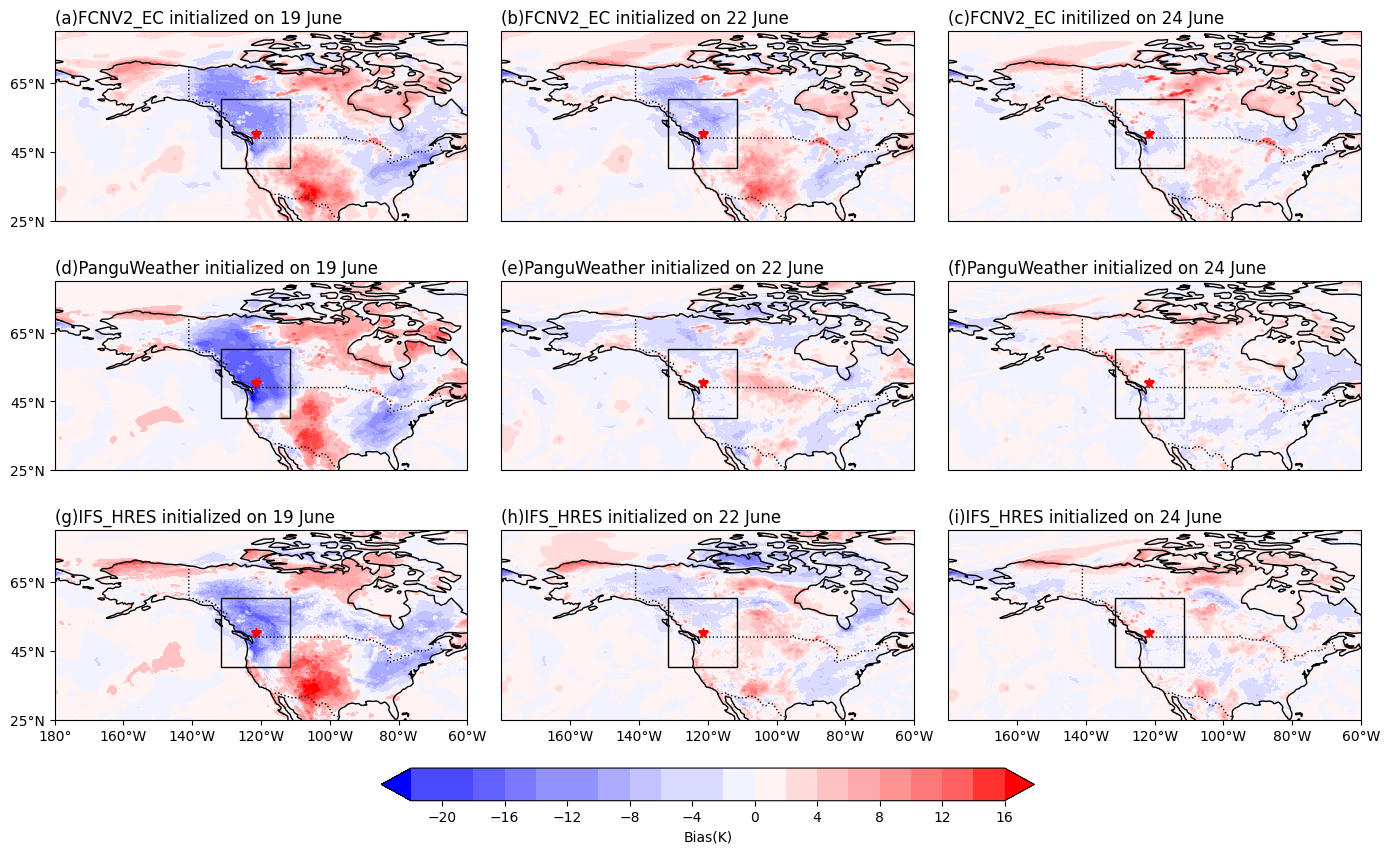

In [48]:
v1= difference_fcnv2_ec_era5_t2m_na_0619
v2= difference_fcnv2_ec_era5_t2m_na_0622
v3= difference_fcnv2_ec_era5_t2m_na_0624
v4= difference_pangu_ec_era5_t2m_na_0619
v5= difference_pangu_ec_era5_t2m_na_0622
v6= difference_pangu_ec_era5_t2m_na_0624
v7= difference_ec_era5_t2m_na_0619
v8= difference_ec_era5_t2m_na_0622
v9= difference_ec_era5_t2m_na_0624
title1= '(a)FCNV2_EC initialized on 19 June'
title2= '(b)FCNV2_EC initialized on 22 June'
title3= '(c)FCNV2_EC initilized on 24 June'
title4= '(d)PanguWeather initialized on 19 June'
title5= '(e)PanguWeather initialized on 22 June'
title6= '(f)PanguWeather initialized on 24 June'
title7= '(g)IFS_HRES initialized on 19 June'
title8= '(h)IFS_HRES initialized on 22 June'
title9= '(i)IFS_HRES initialized on 24 June'
pathdirect= '/home/kit/imktro/gj5173/result1/3*3_t2M_diff_HRES_1075".png'
make_middle_9plots(v1,v2,v3,v4,v5,v6,v7,v8,v9,title1,title2,title3,title4,title5,title6,title7,title8,title9,pathdirect)

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_dataarray()` method.

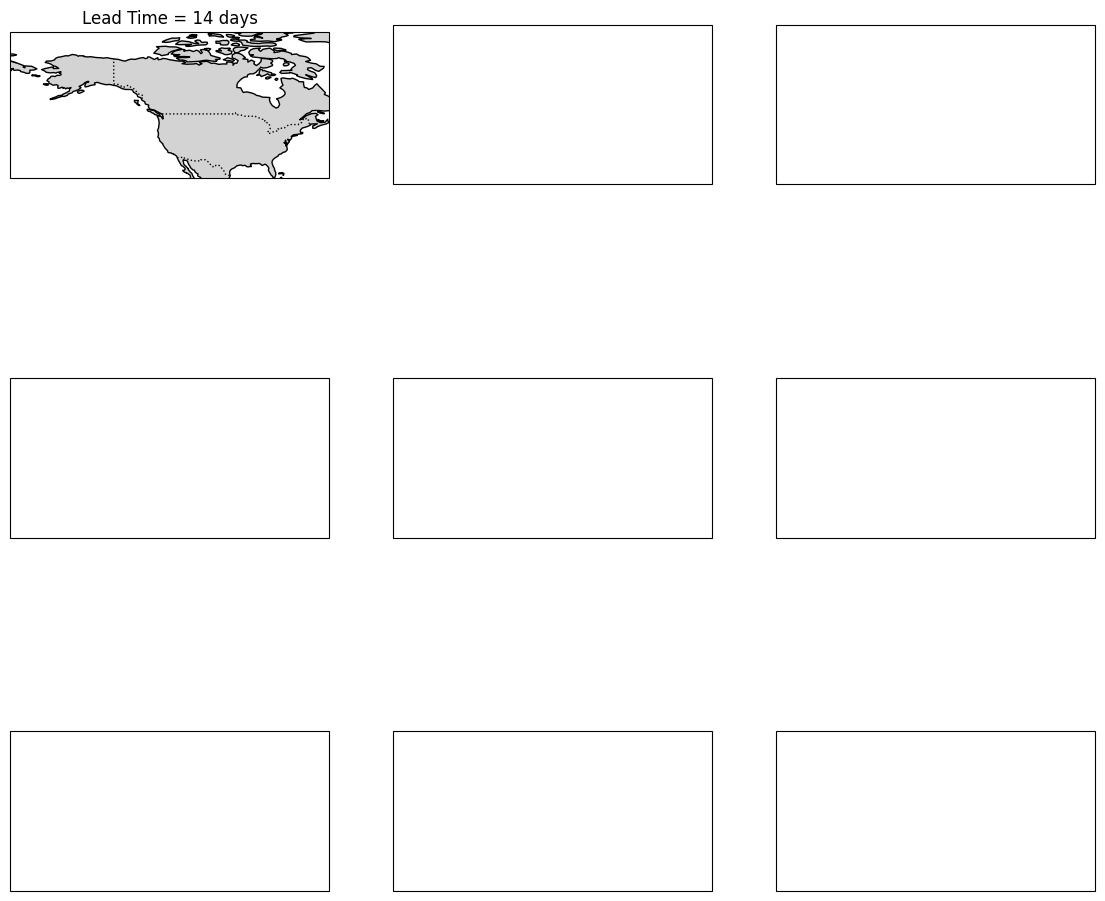

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker 
import numpy as np

# Create a new subplot for additional plots
fig, axs = plt.subplots(3, 3, figsize=(14, 13), subplot_kw={'projection': ccrs.PlateCarree()})

(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

cmap = shifted_cmap
plot_kwargs = dict(cmap=cmap, levels=21, vmin=-300, vmax=430)
leftlon, rightlon, lowerlat, upperlat = (-180, -60, 25, 80)  # Define map extent
lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)
x, y = lon_grid, lat_grid
# Function to add common features to all axes
def add_features(ax):
    ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='w')
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

# First subplot
add_features(ax1)
ax1.set_title('Lead Time = 14 days')
ax1.set_ylabel('ECMWF')
#contour1 = ax1.contourf(x, y, anombias_ec_14 / 9.80665, **plot_kwargs, extend='both')
contour4_1 = ax1.contour(x, y, anao_ds_pangu_z500_na_0629_0619 / 9.80665, levels=11, colors='black', linewidths=0.5)
#contour4_1 = ax1.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Second subplot
add_features(ax2)
ax2.set_title('Lead Time = 7 days')
contour2 = ax2.contourf(x, y, anombias_ec_7 / 9.80665, **plot_kwargs)
contour4_1 = ax2.contour(x, y, anomaly_ec_7 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax2.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Third subplot
add_features(ax3)
ax3.set_title('Lead Time = 3 days')
contour3 = ax3.contourf(x, y, anombias_ec_3 / 9.80665, **plot_kwargs)
contour4_1 = ax3.contour(x, y, anomaly_ec_3 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax3.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Fourth subplot
add_features(ax4)
ax4.set_ylabel('FCNV1_EC')
contour4 = ax4.contourf(x, y, anombias_fcnv1_ec_14 / 9.80665, **plot_kwargs)
contour4_1 = ax4.contour(x, y, anomaly_fcnv1_ec_14 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax4.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Fifth subplot
add_features(ax5)
contour4 = ax5.contourf(x, y, anombias_fcnv1_ec_7 / 9.80665, **plot_kwargs)
contour4_1 = ax5.contour(x, y, anomaly_fcnv1_ec_7 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax5.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Sixth subplot
add_features(ax6)
contour4 = ax6.contourf(x, y, anombias_fcnv1_ec_3 / 9.80665, **plot_kwargs)
contour4_1 = ax6.contour(x, y, anomaly_fcnv1_ec_3 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax6.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Seventh subplot
add_features(ax7)
ax7.set_ylabel('FCNV1_GAUSS')
contour4 = ax7.contourf(x, y, anombias_fcnv1_era_14 / 9.80665, **plot_kwargs)
contour4_1 = ax7.contour(x, y, anomaly_fcnv1_era_14 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax7.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Eighth subplot
add_features(ax8)
contour4 = ax8.contourf(x, y, anombias_fcnv1_era_7 / 9.80665, **plot_kwargs)
contour4_1 = ax8.contour(x, y, anomaly_fcnv1_era_7 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax8.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Ninth subplot
add_features(ax9)
contour4 = ax9.contourf(x, y, anombias_fcnv1_era_3 / 9.80665, **plot_kwargs)
contour4_1 = ax9.contour(x, y, anomaly_fcnv1_era_3 / 9.80665, levels=11, colors='black', linewidths=0.5)
contour4_1 = ax9.contour(x, y, anomaly_era5_z500_na_0629_interpolated / 9.80665, levels=11, colors='red', linewidths=0.5)

# Add a colorbar
cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', cmap=cmap, shrink=0.5, label='(m)', pad=0.05, extend='both')

# Save the combined plot to a file
#plt.savefig('/home/kit/imk-tro/gj5173/not_finalized_yet_plots/3x3_ANOMBIAS_z500_1473withrec.png', bbox_inches='tight', dpi=150)

# Show the combined plot
plt.show()

In [56]:
#colorbar setting
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [58]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#10:14146E-20:1529D4-30:2F66B9-48:FFFFFF-52:FFFFFF-70:BA5B05-80:CC0A00-90:852800
      (0.000, (0.078, 0.078, 0.431)),
    (0.100, (0.078, 0.078, 0.431)),
    (0.200, (0.082, 0.161, 0.831)),
    (0.300, (0.184, 0.400, 0.725)),
    (0.460, (1.000, 1.000, 1.000)),
    (0.540, (1.000, 1.000, 1.000)),
    (0.700, (0.937, 0.455, 0.012)),
    (0.800, (0.953, 0.373, 0.224)),
    (0.900, (0.906, 0.000, 0.078)),
    (1.000, (0.906, 0.000, 0.078))))

In [59]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.4 ,name='shifted_80')

/scratch/slurm_tmpdir/job_23769021/ipykernel_77006/1069867171.py:57: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)
